## Handwritten Image Detection with Keras using MNIST data

In this assignment we will work with image data: specifically, the famous MNIST data set.  This data set contains 70,000 images of handwritten digits in grayscale (0=black, 255 = white).  The images are 28 pixels by 28 pixels for a total of 784 pixels.  This is quite small by image standards.  Also, the images are well centered and isolated.  This makes this problem solvable with standard fully connected neural nets without too much pre-work.

In the first part of this notebook, we will walk you through loading in the data, building a network, and training it.  Then it will be your turn to try different models and see if you can improve performance

In [2]:
# Preliminaries

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Matplotlib is building the font cache; this may take a moment.


Let's explore the dataset a little bit

In [3]:
# Load the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [4]:
x_train[0].shape

(28, 28)

In [5]:
#Let's just look at a particular example to see what is inside

x_train[333]  ## Just a 28 x 28 numpy array of ints from 0 to 255

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  87, 138,
        170, 253, 201, 244, 212, 222, 138,  86,  22,   0,   0,   0,   0,
          0,   0],
       [  

In [6]:
# What is the corresponding label in the training set?
y_train[333]

8

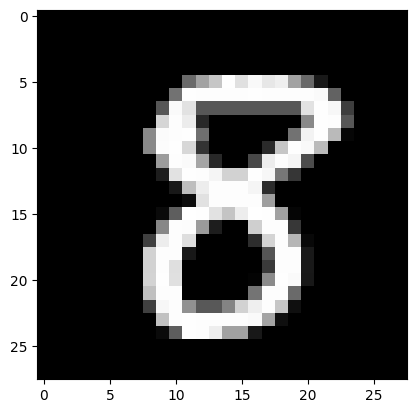

In [7]:
# Let's see what this image actually looks like

plt.imshow(x_train[333], cmap='Greys_r')
plt.show()

In [8]:
# this is the shape of the np.array x_train
# it is 3 dimensional.
print(x_train.shape, 'train samples')
print(x_test.shape, 'test samples')

(60000, 28, 28) train samples
(10000, 28, 28) test samples


In [9]:
## For our purposes, these images are just a vector of 784 inputs, so let's convert
x_train = x_train.reshape(len(x_train), 28*28)
x_test = x_test.reshape(len(x_test), 28*28)

## Keras works with floats, so we must cast the numbers to floats
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

## Normalize the inputs so they are between 0 and 1
x_train /= 255
x_test /= 255


In [10]:
# convert class vectors to binary class matrices (one-hot encoding)
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

y_train[333]  # now the digit k is represented by a 1 in the kth entry (0-indexed) of the length 10 vector 

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])

In [11]:
# We will build a model with one hidden layer of size 64
# Fully connected inputs at each layer
# We will use dropout of .2 to help regularize
model_1 = Sequential()
model_1.add(Dense(64, activation='relu', input_shape=(784,)))
model_1.add(Dropout(0.2))
model_1.add(Dense(10, activation='softmax'))

/Users/beyzakaya/miniforge3/envs/keras_env/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
## Note that this model has a LOT of parameters
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,890 (198.79 KB)

 Trainable params: 50,890 (198.79 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
# Let's compile the model
learning_rate = .0015
model_1.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(learning_rate=learning_rate),
              metrics=['accuracy'])
# note that `categorical cross entropy` is the natural generalization 
# of the loss function we had in binary classification case, to multi class case

In [33]:
# And now let's fit.

batch_size = 32  # mini-batch with 32 examples
epochs = 5
history_1 = model_1.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 571us/step - accuracy: 0.9655 - loss: 0.1283 - val_accuracy: 0.9727 - val_loss: 0.1028
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 453us/step - accuracy: 0.9665 - loss: 0.1218 - val_accuracy: 0.9735 - val_loss: 0.1088
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 455us/step - accuracy: 0.9675 - loss: 0.1177 - val_accuracy: 0.9734 - val_loss: 0.1191
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 463us/step - accuracy: 0.9676 - loss: 0.1132 - val_accuracy: 0.9744 - val_loss: 0.1089
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 500us/step - accuracy: 0.9706 - loss: 0.1110 - val_accuracy: 0.9722 - val_loss: 0.1161


In [15]:
## We will use Keras evaluate function to evaluate performance on the test set

score = model_1.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.11442189663648605
Test accuracy: 0.9696999788284302


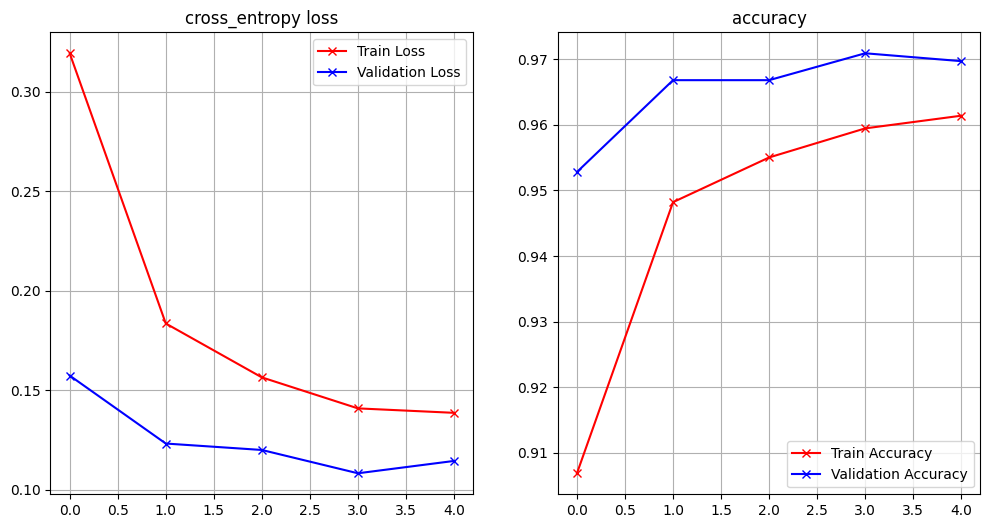

In [16]:
def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)


    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history["accuracy"],'r-x', label="Train Accuracy")
    ax.plot(history.history["val_accuracy"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)
    plt.show()
    

plot_loss_accuracy(history)

## Assignment
### PART-1: Build your own model
Use the Keras "Sequential" functionality to build `model_2` with the following specifications:

1. Two hidden layers.
2. First hidden layer of size 32, and second of size 48 neurons.
3. Dropout of 0.3 at each layer.
4. How many parameters does your model have?  How does it compare with model_1?
5. Train this model for 40 epochs with ADAM at a learning rate of 0.0015 and a batch size of 16.
6. Evaluate the test results.




In [17]:
### Build your model here
model_2 = Sequential()
model_2.add(Dense(32, activation='relu', input_shape=(784,))) # Hidden layer of size 32, activation as ReLU
model_2.add(Dropout(0.3)) # dropout after first layer

model_2.add(Dense(48, activation='relu')) # hidden layer of 48, activation as ReLU
model_2.add(Dropout(0.3)) # dropout after second layer

model_2.add(Dense(10, activation='softmax')) # output layer with 10 classes (we have 10 classes in total), activation function as softmax because we have a classification task with multiclasses

/Users/beyzakaya/miniforge3/envs/keras_env/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
model_2.summary() # for how many parameters model have question, we can investigate model summary
# First hidden layer: 32 as a hidden layer size each with 784 input connections + 1 as a bias (784 + 1) * 32 = 25,120 parameters
# Second hidden layer: 48 as a hidden layer size each with 32 input connections + 1 as a bias (32 + 1) * 48 = 1,584 parameters
# Output layer: 10 neurons each with 48 connections + 1 as a bias (48 + 1) * 10 = 490 parameters

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 32)             │        25,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 48)             │         1,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 48)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           490 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,194 (106.23 KB)

 Trainable params: 27,194 (106.23 KB)

 Non-trainable params: 0 (0.00 B)

model_1 has 50,890 parameters in total and model_2 has 27,194 parameters in total.
model_2 has fewer parameters if we compare with model_1.

model_1 has one hidden layer with 64 hidden layers while model_2 has two hidden layers with 32 and 48 hidden sizes as a structural difference.

As a result, model_1 has more parameters compare to the model_2 and may learn more complex patterns because of its dimension of hidden layer is larger, at the same time it can be more tendency to overfitting depend on the task of the model.

In [19]:
from keras.optimizers import Adam # import Adam as an optimizer

learning_rate = 0.0015 # set the learning rate as .0015
model_2.compile(loss='categorical_crossentropy',
                optimizer=Adam(learning_rate=learning_rate), # specification of learning rate for the optimizer Adam
                metrics=['accuracy']) # we have categorical cross entropy because we have a task of multi-class classification

In [20]:
batch_size = 16 # set the batch size as 16
epochs = 40 # set the number of epochs as 40 

# Fit the model 2 with specificed model charachteristics and validate it after
history_2 = model_2.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test)
)

Epoch 1/40
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 2s 479us/step - accuracy: 0.7536 - loss: 0.7785 - val_accuracy: 0.9332 - val_loss: 0.2212
Epoch 2/40
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 2s 428us/step - accuracy: 0.8862 - loss: 0.3772 - val_accuracy: 0.9406 - val_loss: 0.1935
Epoch 3/40
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 2s 429us/step - accuracy: 0.9005 - loss: 0.3311 - val_accuracy: 0.9469 - val_loss: 0.1764
Epoch 4/40
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 2s 400us/step - accuracy: 0.9093 - loss: 0.3060 - val_accuracy: 0.9495 - val_loss: 0.1652
Epoch 5/40
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 1s 387us/step - accuracy: 0.9111 - loss: 0.2961 - val_accuracy: 0.9513 - val_loss: 0.1692
Epoch 6/40
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 1s 396us/step - accuracy: 0.9116 - loss: 0.2946 - val_accuracy: 0.9543 - val_loss: 0.1525
Epoch 7/40
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 2s 445us/step - accuracy: 0.9159 - loss: 0.2827 - val_accuracy: 0.9559 - val_loss: 0.1587
Epoch 8/40
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 2s 427us/step - accuracy: 0.9175 -

In [39]:
# Evaluate model_2 using test data with loss and accuray
score_2 = model_2.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score_2[0])
print('Test accuracy:', score_2[1])

Test loss: 0.14147143065929413
Test accuracy: 0.961899995803833


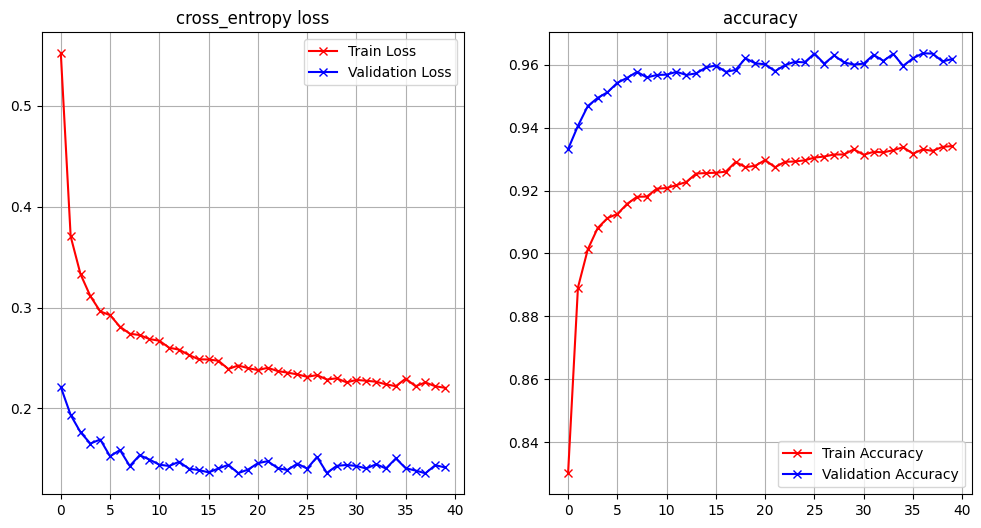

In [22]:
def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)


    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history["accuracy"],'r-x', label="Train Accuracy")
    ax.plot(history.history["val_accuracy"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)
    plt.show()
    

plot_loss_accuracy(history_2)

### PART-2: Think about the following questions

1) How do model_1 and model_2 compare?  Which do you prefer?  If you were going to put one into production, which would you choose and why?

2) Compare the trajectories of the loss function on the training set and test set for each model?  How do they compare?  What does that suggest about each model?  Do the same for accuracy.  Which do you think is more meaningful, the loss or the accuracy?

3) Suggest an improvement to model_2 (changing structure, learning rate, number of epochs, etc.) that you think will result in a better model.  Try it out below?  How much improvement can you achieve?

PART-2 Quesiton-1

In [29]:
model_1_metrics = {
    'Total Parameters': 50890,
    'Test Loss': 0.11442,  
    'Test Accuracy': 0.96969
}

model_2_metrics = {
    'Total Parameters': 27194,
    'Test Loss': 0.14147, 
    'Test Accuracy': 0.96189
}

In [30]:
print(f"{'Metric':<20} {'Model 1':<15} {'Model 2':<15}")
print("=" * 50)
for metric in model_1_metrics:
    print(f"{metric:<20} {model_1_metrics[metric]:<15} {model_2_metrics[metric]:<15}")


Metric               Model 1         Model 2        
Total Parameters     50890           27194          
Test Loss            0.11442         0.14147        
Test Accuracy        0.96969         0.96189        


## 1. Model Complexity
- **Model 1** has more parameters compare to the **Model 2** as discussed after rewieving the model summary. 
- **Model 1** can capture more complex features because of the number of parameters compare with **Model 1**.

## 2. Test Performance
- **Model 1** has a lower test loss value than the **Model 2** so **Model 1** performs better in the prediction of test set.
- **Model 1** has higher test accuracy so we can say **Model 1** can generalize better when we look into the test results.

## 3. Conclusion: Model 1 for Production
- I preferred **Model 1** into production because it has slightly fewer epochs and gets better results for both accuracy and loss in testing so we can say convergence of the model is better than the **Model 2**
- **Model 1** is doubled the total number of parameters but it is not too much and we can see from the test results, it has a better effect of generalization the test set.

PART-2 Quesiton-2

In [37]:
def plot_model_comparison(history_1, history_2):
    plt.figure(figsize=(14, 6))
    
    plt.subplot(1, 2, 1)
    plt.plot(history_1.history['loss'], 'r-x', label='Model 1 Train Loss')
    plt.plot(history_1.history['val_loss'], 'b-x', label='Model 1 Test Loss')
    plt.plot(history_2.history['loss'], 'r-o', label='Model 2 Train Loss')
    plt.plot(history_2.history['val_loss'], 'b-o', label='Model 2 Test Loss')
    plt.title('Comparison of Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history_1.history['accuracy'], 'r-x', label='Model 1 Train Accuracy')
    plt.plot(history_1.history['val_accuracy'], 'b-x', label='Model 1 Test Accuracy')
    plt.plot(history_2.history['accuracy'], 'r-o', label='Model 2 Train Accuracy')
    plt.plot(history_2.history['val_accuracy'], 'b-o', label='Model 2 Test Accuracy')
    plt.title('Comparison of Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()


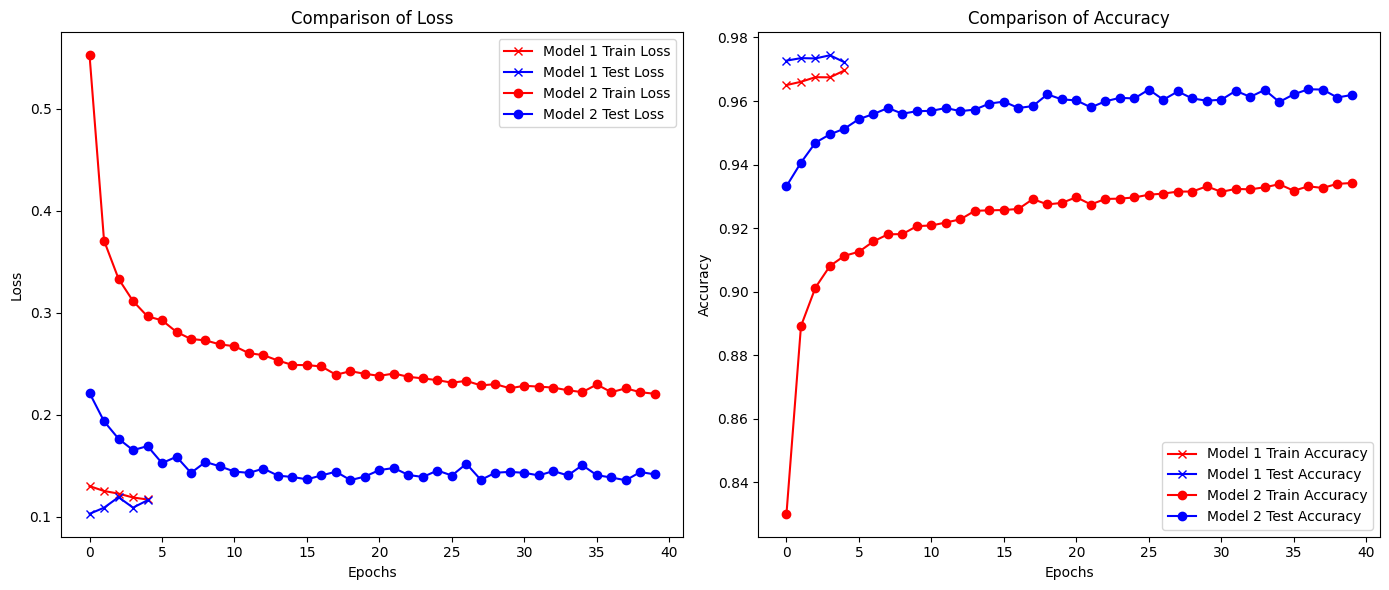

In [38]:
plot_model_comparison(history_1, history_2)

### Compare the trajectories of the loss function on the training set and test set for each model
- **Model 1** : 
    - Training loss decreases quickly and stay stationary in a lower value 
    - Test loss decreases to the lower values like in training so it shows better generalization of the model

- **Model 2** : 
    - Training loss decreases gradually but it converges at a higher value than the **Model 1**
    - Test loss is decreasing with more fluctuations but has a higher value compare with **Model 1**
- #### Loss comparison result
    - **Model 1** shows better performance for both train and test sets in terms of loss decreases. 

###  Compare the trajectories of accuracy on the training set and test set for each model
- **Model 1** :
    - Training accuracy increases quickly for **Model 1** and steady at around 96%
    - Test accuracy steady at around 97% and it shows model can generalize the patterns while training then can be used in testing

- **Model 2** :
    - Training accuracy increases quickly but keep same in the lower value compare to the **Model 1**
    - Test accuracy is stays same in the lower value compare to the **Model 1** with more fluctuations

- #### Accuracy comparison result
    - **Model 1** achieves higher accuracy with fewer number of epochs. **Model 2** has a lower value both in training and testing in terms of accuracy so **Model 1** has a better performance

###  What does that suggest about each model?
- **Model 1** achieves more lower loss and higher accuracy value more faster than **Model 2**.
- **Model 2** has a fewer number of parameters so it might not capture the complex patterns. 

### Which do you think is more meaningful, the loss or the accuracy?

- **Loss** : Evaluates the objective function and provides comprehensive information about how well the model fits the data. With the help of training and test loss gaps, it can be used to determine overfitting or underfitting.

- **Accuracy** : Gives correct prediction percentage so it is easier to examine but sometimes not clarifies some issues for example if the test or train dataset is not balanced about labels then the class distributions imbalanced in this case or there is a problem while loss is decreasing but the accuracy not improving in the same way.

- In conclusion, we can't say this one is more meaningful than the other. Those metrics are measuring different things and based on that metrics we can evaluate different features of the model. If the model is consistent for the task given, then loss is decreasing steadily and in this case accuracy also has a higher value because model can learn in the way that model fitted. Loss plot while training gives an idea of convergence and we can compare the gaps of train and test loss plots to evaluate generalization of the model for looking if training and test loss plots are parallel while accuracy gives us clearer information about model's prediction ability. 

PART-2 Quesiton-3

In [40]:
model_3 = Sequential()
model_3.add(Dense(128, activation='relu', input_shape=(784,))) # first layer with 128 dimensions and input shape as 784, activation function is ReLU
model_3.add(Dropout(0.5)) # use dropout for first layer
model_3.add(Dense(64, activation='relu')) # second layer with 64 neurons and activation function is ReLU
model_3.add(Dropout(0.5)) # use dropout for second layer
model_3.add(Dense(32, activation='relu')) # third layer with 32 neurons and activation function is ReLU
model_3.add(Dense(10, activation='softmax')) # output layer with 10 classes, we have multi-class classification case so activation function as softmax

/Users/beyzakaya/miniforge3/envs/keras_env/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Model Structure of Model 3

- **Model 3** has three layers but **Model 2** has two layers so **Model 3** has more trainable parameters than the **Model 2**
- **Model 3** has different number of neurons in different layers with more structural change compare to the **Model 2**
- Both **Model 2** and **Model 3** have dropout after each layer but **Model 3** has greater probability value of droput to handle overfitting


In [42]:
model_3.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111,146 (434.16 KB)

 Trainable params: 111,146 (434.16 KB)

 Non-trainable params: 0 (0.00 B)

**Model 3** has more trainable parameters than both **Model 1** and **Model 2** 
It might generalize complex patterns maybe so more parameter can conclude in better loss and accuracy values

In [41]:
learning_rate = 0.001 # set the learning rate as used in common cases
model_3.compile(loss='categorical_crossentropy', # our loss is categorical corss entropy because we have 10 classes as a categories
                optimizer=Adam(learning_rate=learning_rate), # can use Adam as an optimizer as in model 2
                metrics=['accuracy'])

I changed the learning rate to the more common value because **Model 3** has a more complex model structure compare to the **Model 2** so lowering learning rate might conclude in more stable convergence
I changed the batch size to testing purposes
I changed the number of epochs because **Model 3** has a more trainable parameters compare to the **Model 2**

In [43]:
batch_size = 64 # set the batch size
epochs = 50 # train more epochs to learn more parameters
history_3 = model_3.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test))

Epoch 1/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6290 - loss: 1.0956 - val_accuracy: 0.9363 - val_loss: 0.2165
Epoch 2/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8943 - loss: 0.3714 - val_accuracy: 0.9550 - val_loss: 0.1621
Epoch 3/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9182 - loss: 0.2918 - val_accuracy: 0.9612 - val_loss: 0.1376
Epoch 4/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 977us/step - accuracy: 0.9302 - loss: 0.2466 - val_accuracy: 0.9647 - val_loss: 0.1249
Epoch 5/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9351 - loss: 0.2327 - val_accuracy: 0.9655 - val_loss: 0.1177
Epoch 6/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 975us/step - accuracy: 0.9399 - loss: 0.2142 - val_accuracy: 0.9696 - val_loss: 0.1063
Epoch 7/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9429 - loss: 0.2010 - val_accuracy: 0.9680 - val_loss: 0.1172
Epoch 8/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9454 - loss: 0.1927 - val_accuracy

In [45]:
# Evaluate model_3 using test data with loss and accuray
score_3 = model_3.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score_3[0])
print('Test accuracy:', score_3[1])

Test loss: 0.09168993681669235
Test accuracy: 0.9765999913215637


In [49]:
model_1_metrics = {
    'Total Parameters': 50890,
    'Test Loss': 0.11442,  
    'Test Accuracy': 0.96969
}

model_2_metrics = {
    'Total Parameters': 27194,
    'Test Loss': 0.14147, 
    'Test Accuracy': 0.96189
}

model_3_metrics = {
    'Total Parameters': 111146,
    'Test Loss': 0.09168, 
    'Test Accuracy': 0.97659
}


In [50]:
# Heading of the three model 
print(f"{'Metric':<20}{'Model 1':<15}{'Model 2':<15}{'Model 3':<15}")
print("="*65)

print(f"{'Total Parameters':<20}{model_1_metrics['Total Parameters']:<15}{model_2_metrics['Total Parameters']:<15}{model_3_metrics['Total Parameters']:<15}")
print(f"{'Test Loss':<20}{model_1_metrics['Test Loss']:<15}{model_2_metrics['Test Loss']:<15}{model_3_metrics['Test Loss']:<15}")
print(f"{'Test Accuracy':<20}{model_1_metrics['Test Accuracy']:<15}{model_2_metrics['Test Accuracy']:<15}{model_3_metrics['Test Accuracy']:<15}")

Metric              Model 1        Model 2        Model 3        
Total Parameters    50890          27194          111146         
Test Loss           0.11442        0.14147        0.09168        
Test Accuracy       0.96969        0.96189        0.97659        


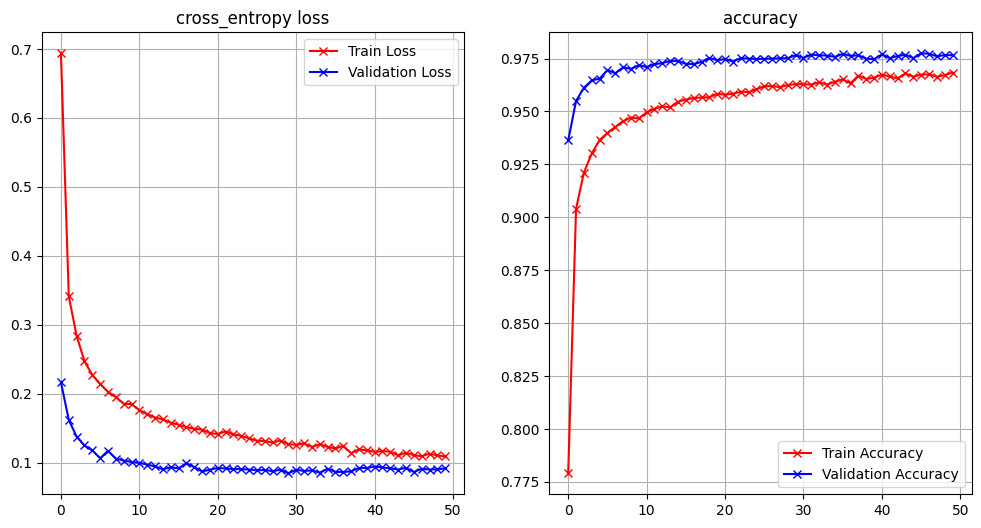

In [46]:

plot_loss_accuracy(history_3)

### Improvement of Model 3
- Number of layers are increased to capture more complex data
- Learning rate dropped to value 0.001 for stable convergence
- Number of epochs inceared to 50 for give a chance to learn from train data

#### Quantitative Results of Model 3
After training and evaluationg **Model 3**, I observed the metrics as:
- Test loss: 0.09168993681669235
- Test accuracy: 0.9765999913215637
- We can calculate the improvement with **Model 2**'s values
- Improvement in test loss: [(0.14147143065929413 - 0.09168993681669235)/ 0.14147143065929413] x 100 = %35.18
- Improvement in test accuracy [(0.9765999913215637 - 0.961899995803833)/ 0.961899995803833] x 100 = %1.52

- In conclusion, changes made in **Model 3** results in %35.18 decrease in the test loss and approximately %1.52 increase in tes accuracy. 
- Expanding the model using more layers yielded more successful results thanks to capturing more complex and different points.